# HW5: Machine Learning

Due: May 15, 11:59 PM.

## Please restart the kernel and run all before you submit ! (-1 Point if you forget to do it)

## Your name (-1 Point if you do not type your name here): Amay Jain

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [2]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [3]:
from sklearn.model_selection import train_test_split


# converting data from a Bunch object to a dataframe, so that it is easier for me to conceptualize

df = pd.DataFrame(data.data, columns = data.feature_names)
X = df.copy()

df['target'] = data.target
y = df['target'].copy()


# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
455,13.380,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.14210,0.070030,0.07763,0.2196,0.07675
424,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.019670,0.2538,0.07029,...,11.21,23.17,71.79,380.9,0.1398,0.13520,0.020850,0.04589,0.3196,0.08009
362,12.760,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.1298,0.18390,0.125500,0.08312,0.2744,0.07238
139,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
357,13.870,16.21,88.52,593.7,0.08743,0.05492,0.015020,0.020880,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.1153,0.10080,0.052850,0.05556,0.2362,0.07113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.400000,0.16250,0.2364,0.07678
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.030270,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.1060,0.13760,0.161100,0.10950,0.2722,0.06956
367,12.210,18.02,78.31,458.4,0.09231,0.07175,0.043920,0.020270,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.1368,0.21700,0.241300,0.08829,0.3218,0.07470
276,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,0.05821,...,12.20,18.99,77.37,458.0,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386


**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: You want to make sure that the test data is completely untouched when fitting a model, but if you use dimension reduction algorithms before splitting your data, then that algorithm would have used information from your test data that you wanted untouched and the model would have seen the test data.

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, lengends, and etc) should be similar.

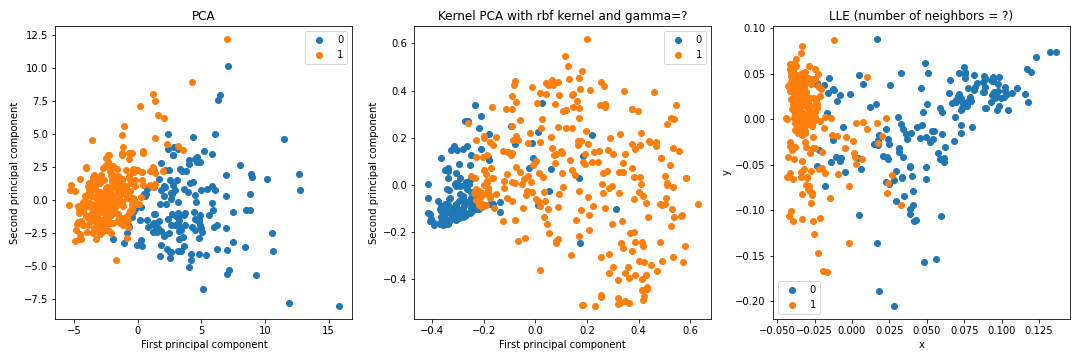

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





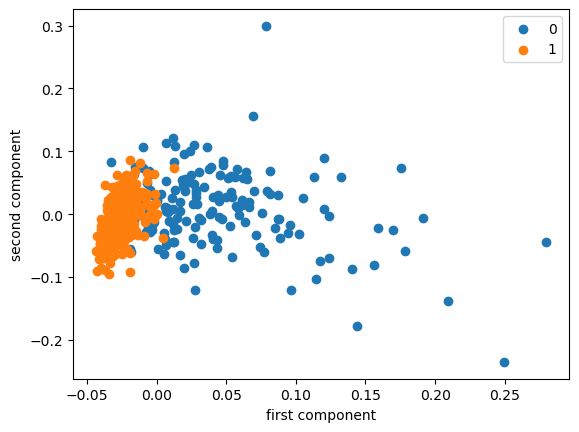

In [22]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

pca = PCA()
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
lle = LocallyLinearEmbedding(n_components = 10, n_neighbors = 50)

X_pca = pca.fit_transform(X_train)
X_kernel_pca = rbf_pca.fit_transform(X_train)
X_lle = lle.fit_transform(X_train)

# for label in np.unique(y_train):
#     plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1], label = label)
#     plt.legend()

# for label in np.unique(y_train):
#     plt.scatter(X_kernel_pca[y_train == label, 0], X_kernel_pca[y_train == label, 1], label = label)
#     plt.legend()

for label in np.unique(y_train):
    plt.scatter(X_lle[y_train == label, 0], X_lle[y_train == label, 1], label = label)
    plt.legend()

# plt.scatter(X_kernel_pca[y_train == 0, 0], X_kernel_pca[y_train == 0, 1], label = 0)
# plt.legend()

plt.xlabel('first component')
plt.ylabel('second component')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.show()

# print(rbf_pca.explained_variance_ratio_)

# print(np.cumsum(rbf_pca.explained_variance_ratio_))

In [25]:
X_kernel_pca[y_train == 0, 0]

X_kernel_pca[y_train == 0, 1]

array([-0.00390945, -0.00390881, -0.00390881, -0.00391076, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390882, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.00390882, -0.00400158, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390925, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.0039322 , -0.00390887, -0.00390881, -0.00390881,
       -0.00390881, -0.00390881, -0.00390881, -0.00390881, -0.00390881,
       -0.00390881, -0.0039092 , -0.00390881, -0.00390881, -0.00

## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

(Tpye your answer here)

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [7]:
#### Your code here


#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [8]:
#### Your function here


#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

In [9]:
#### Your code here


#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

In [10]:
#### Your code here


#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

In [11]:
#### Your code here


#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

In [12]:
#### Your code here


#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

In [13]:
#### Your code here
